In [62]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import *
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
import random



X_train , y_train = load_svmlight_file("a9a.txt", n_features=123)#读取训练集
X_test, y_test = load_svmlight_file("a9a.t", n_features=123)#读取数据集

y_train =  y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0],1)

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0
iteration = 500 #循环次数500


In [63]:
#随机梯度
def gradient_sgd(w):
    random_num = random.randint(0,m)
    return (X_train[random_num].T * (sigmoid(X_train[random_num] * w) - y_train[random_num]))
#sigmoid函数
def sigmoid(z):
    return 1/(1+exp(-z))
#计算loss
def loss(x,y,w):
    return  -( y*log(sigmoid(x * w)) + (1-y)*log(1-sigmoid(x * w)) ).sum()/ x.shape[0]

loss_train,loss_test = ([],[])
m, n = np.shape(X_train)
w = np.ones((n, 1))#初始化参数
alpha = 0.01#学习率
#随机梯度实现
def SGD(w):
    for i in range(0, iteration):
        gradient = gradient_sgd(w)
        w = w - alpha * gradient
        loss_train.append(loss(X_train , y_train ,w))
        loss_test.append(loss(X_train , y_train ,w))
if __name__=='__main__':
    SGD(w)
    print(loss_train,'\n')
    print(loss_test,'\n')


[10.465092648910758, 10.41038101192682, 10.357399062506961, 10.31273501951363, 10.265692691087802, 10.225070601003244, 10.172522646786687, 10.116229438143472, 10.076651564434437, 10.02714162703132, 9.9921290254008177, 9.9921291119355988, 9.9517739740660751, 9.913976776537611, 9.9139768805089492, 9.8677727528133019, 9.8256916463794468, 9.7770017729431711, 9.7283210452461724, 9.6730230816920333, 9.6285490016624191, 9.577583182685192, 9.5775833179347245, 9.5283380051887203, 9.4773372796033755, 9.4324121794672333, 9.3856304642198065, 9.3856306742555358, 9.3342562663047151, 9.2813405143179253, 9.2281161772356644, 9.2281164232110324, 9.1756642318947126, 9.1251895615033458, 9.0754496589205118, 9.0319780239192244, 8.9965557610892759, 8.9574055516546682, 8.9135698331467204, 8.8639446867596554, 8.8318344038037999, 8.7844064013258087, 8.7332018747764302, 8.7332023416707596, 8.7332027100415157, 8.683512952263559, 8.6297443576053041, 8.5752721544877577, 8.525872849092357, 8.5258770180749863, 8.5258

In [56]:
lossNAG_train,lossNAG_test = ([],[])
w = np.ones((n, 1))

def NAG(w):
    vt = 0
    gama = 0.9
    i= 0
    for i in range(0 , iteration):
        gradient = gradient_sgd(w - gama * vt)
        vt = gama * vt + alpha * gradient
        w = w - vt
        lossNAG_train.append(loss(X_train , y_train ,w))
        lossNAG_test.append(loss(X_train , y_train ,w))
if __name__=='__main__':
    NAG(w)
    print(lossNAG_train,'\n')
    print(lossNAG_test,'\n')

[10.513990327674723, 10.473321773600835, 10.390432925912034, 10.263718334424155, 10.099145650817265, 9.9510303802929965, 9.8177267963577393, 9.6409431645443799, 9.4409809489602061, 9.2123938331259048, 9.0066660858828218, 8.768932311814698, 8.5549732579204836, 8.3624123976867999, 8.1358799695537982, 7.8861449681693738, 7.6613880310176414, 7.4197140014906502, 7.1582993867611595, 6.8743856783511532, 6.5679459562330811, 6.2921847714483405, 5.9990076642486239, 5.696894860303245, 5.4251213800797942, 5.1807186339644629, 4.9137617288530082, 4.6227626271365887, 4.3615273018532967, 4.0740578142165642, 3.7714253499344168, 3.4620786542201172, 3.1523455151717448, 2.8298638975090236, 2.5057174597286123, 2.1836115952505701, 1.8790985517055805, 1.5991709903675921, 1.3447310268887775, 1.1411604605144541, 0.98090091187710271, 0.86394345627106606, 0.78383502426396923, 0.72686959829347597, 0.69048689770978244, 0.65915879341837724, 0.63727208696065551, 0.62197561741562934, 0.61447143270957516, 0.6107046280

In [57]:
lossRms_train,lossRms_test = ([],[])
w = np.ones((n, 1))
#Rmsprop实现
def Rmsprop(w):
    gama = 0.9
    vt = 0
    Gt = 0
    e=1e-8  
    aqlpha = 0.01
    
    for i in range (0 , iteration):
        gradient = gradient_sgd(w - gama*vt)
        Gt =  gama* Gt + ((1-gama)*(gradient**2)).sum()
        w = w - alpha*gradient/math.sqrt(Gt + e)
        lossRms_train.append(loss(X_train , y_train , w ))
        lossRms_test.append(loss(X_test , y_test , w ))
        
if __name__== '__main__':
    Rmsprop(w)
    print(lossRms_train,'\n')
    print(lossRms_test,'\n')
    
        

[10.468891239151787, 10.436654447250261, 10.411709571914846, 10.411709594458131, 10.390684989255339, 10.368599913463326, 10.368599936635203, 10.347397779554356, 10.331014102348533, 10.314380550364882, 10.314380569771847, 10.314380593875986, 10.297469101521141, 10.278008995348582, 10.278009104043509, 10.26115073223999, 10.246046164578898, 10.228336111811153, 10.215526299985836, 10.200797804723646, 10.185299447565034, 10.171614442150767, 10.171614457405465, 10.160767460299375, 10.145479694096879, 10.130819994440891, 10.116495949030568, 10.109372614750447, 10.096275975320818, 10.082061681563506, 10.069168597416922, 10.056997613211317, 10.042929766001304, 10.028338893149957, 10.014632645160914, 10.001849340470258, 9.9886315646509711, 9.9738815900656288, 9.9584281536384847, 9.9427171311910527, 9.9307536527330065, 9.9169284522331793, 9.9042209441987303, 9.8928447156655483, 9.8807139441786518, 9.8807139607472703, 9.8807141374780816, 9.8694812072864675, 9.8553371883526282, 9.8553372133386929, 

In [58]:
lossAdelta_train,lossAdelta_test = ([],[])
w = np.ones((n, 1))
#adadelta实现
def adadelta(w):
    gama = 0.9
    Gt=0  
    dt = 0  
    e= 1e-8  
    delta = 0  
    alpha = 2000
    
    for i in range (0 , iteration):
        gradient = gradient_sgd(w)
        Gt = gama * Gt + ((1- gama)*(gradient**2) ).sum()  
        delta = - math.sqrt(dt + e) * gradient/math.sqrt(Gt + e)
        dt =gama * dt+( (1 - gama) * (delta**2) ).sum()  
        w = w + alpha * delta
        lossAdelta_train.append(loss(X_train , y_train , w ))
        lossAdelta_test.append(loss(X_test , y_test , w ))

if __name__== '__main__':
    adadelta(w)
    print(lossAdelta_train,'\n')
    print(lossAdelta_test,'\n')


[9.700416464896259, 8.8835158128884011, 8.1340646378137329, 7.3994238967833539, 6.4861490257114838, 5.4594534201872831, 4.7047704141849556, 3.7727447932023201, 3.1096925761085932, 2.256590800212614, 1.6099850763293835, 1.1984119560532605, 0.95361537080152792, 0.80702787195037451, 1.1188176496572133, 0.81794428080209181, 0.81901472459573343, 0.68172887314108743, 0.76562885507225331, 0.74954929493540334, 0.63555884620797176, 0.58291660574883952, 0.55895804800894178, 0.55885147494114662, 0.58899365563386397, 0.56558061932354442, 0.55310414753613224, 0.55300359773034213, 0.55778574734010966, 0.56536673047151675, 0.557899725621119, 0.54687933151311496, 0.66660152195216926, 0.58798154898941324, 0.53272179097670314, 0.53077813039136057, 0.52766156537789488, 0.52737133261911417, 0.52699576174710172, 0.5936814430930869, 0.52793850306432222, 0.52897532597328889, 0.52898710870054966, 0.59080203156439881, 0.59698928192835055, 0.58018430047010339, 0.58678176256045345, 0.53967727497778217, 0.5215260

In [61]:
lossAdam_train,lossAdam_test = ([],[])
w = np.ones((n, 1))
#adam实现
def adam(w):
    t = 0 
    m = 0  
    v = 0  
    beta1 = 0.9  
    beta2 = 0.995  
    alpha = 0.05
    
    for i in range(0, iteration):
        gradient = gradient_sgd(w)
        t += 1 
        m = beta1*m + ((1-beta1)*gradient).sum() 
        v = beta2*v + ((1-beta2)*(gradient**2)).sum()  
        mt = m/(1-(beta1**t))  
        vt = v/(1-(beta2**t)) 
        w = w - alpha * mt/(math.sqrt(vt) + e)
        lossAdam_train.append (loss(X_train , y_train , w ))
        lossAdam_test.append (loss(X_test , y_test , w ))
        
if __name__== '__main__':
    adam(w)
    print(lossAdam_train,'\n')
    print(lossAdam_test,'\n')

[9.374697028818467, 8.7243796173422936, 7.8729784879338922, 6.9290570921089989, 5.9322516149674298, 4.9020988581033951, 3.8518818628120641, 2.7994840310550599, 1.9351573111123455, 1.1664854858390659, 0.6749674441823148, 0.55531108593190237, 0.63286296856955904, 0.76878794837546249, 0.86961657507014289, 0.91998989629985239, 0.96722535309955826, 1.0111747865155774, 1.0518516722852633, 1.0893638004400195, 1.1238711662773762, 1.1555598233473148, 1.1846257793332406, 1.2112652049798323, 1.2358999045416466, 1.2113544958485571, 1.1446190961141043, 1.0853772188296953, 1.0330180297592559, 0.987330116312645, 0.94759033055657071, 0.87205621586920223, 0.80839806098981548, 0.720625223934512, 0.65357993107103196, 0.60641717948649221, 0.5768607551821352, 0.56120083639120433, 0.55382530822864284, 0.56506909959320717, 0.58241275792431246, 0.59530930572012941, 0.59802264672501082, 0.61996050697105065, 0.62782240934768052, 0.65891187742463864, 0.66938745217709483, 0.7059460474761412, 0.71395636442618826, 

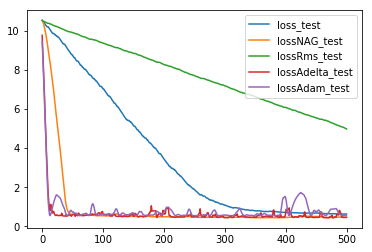

In [60]:
#画图比较
plt.plot(loss_test, label="loss_test")
plt.plot(lossNAG_test, label="lossNAG_test")
plt.plot(lossRms_test, label="lossRms_test")
plt.plot(lossAdelta_test, label ="lossAdelta_test")
plt.plot(lossAdam_test, label="lossAdam_test")
plt.legend(loc="upper right")